In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
/kaggle/input/widsdatathon2025/Data Dictionary.xlsx
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAIN_CATEGORICAL_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAIN_QUANTITATIVE_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx


### Data loading

In [2]:
# Step 1: Set base paths
BASE_PATH = "/kaggle/input/widsdatathon2025"
OLD_PATH = f"{BASE_PATH}/TRAIN_OLD"
NEW_PATH = f"{BASE_PATH}/TRAIN_NEW"


In [3]:
# Step 2: Load OLD data
targets_old = pd.read_excel(f"{OLD_PATH}/TRAINING_SOLUTIONS.xlsx")
fmri_old = pd.read_csv(f"{OLD_PATH}/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
cat_old = pd.read_excel(f"{OLD_PATH}/TRAIN_CATEGORICAL_METADATA.xlsx")
quant_old = pd.read_excel(f"{OLD_PATH}/TRAIN_QUANTITATIVE_METADATA.xlsx")


In [5]:
# Step 3: Load NEW data
targets_new = pd.read_excel(f"{NEW_PATH}/TRAINING_SOLUTIONS.xlsx")
fmri_new = pd.read_csv(f"{NEW_PATH}/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
cat_new = pd.read_excel(f"{NEW_PATH}/TRAIN_CATEGORICAL_METADATA_new.xlsx")
quant_new = pd.read_excel(f"{NEW_PATH}/TRAIN_QUANTITATIVE_METADATA_new.xlsx")


In [6]:
# Step 4: Add source suffix to participant_id before merging
targets_old['participant_id'] = targets_old['participant_id'].apply(lambda x: f"{x}_old")
targets_new['participant_id'] = targets_new['participant_id'].apply(lambda x: f"{x}_new")

fmri_old['participant_id'] = fmri_old['participant_id'].apply(lambda x: f"{x}_old")
fmri_new['participant_id'] = fmri_new['participant_id'].apply(lambda x: f"{x}_new")

cat_old['participant_id'] = cat_old['participant_id'].apply(lambda x: f"{x}_old")
cat_new['participant_id'] = cat_new['participant_id'].apply(lambda x: f"{x}_new")

quant_old['participant_id'] = quant_old['participant_id'].apply(lambda x: f"{x}_old")
quant_new['participant_id'] = quant_new['participant_id'].apply(lambda x: f"{x}_new")


In [7]:
# Step 5: Merge OLD and NEW separately
train_old = targets_old.merge(fmri_old, on="participant_id") \
                       .merge(cat_old, on="participant_id") \
                       .merge(quant_old, on="participant_id")

train_new = targets_new.merge(fmri_new, on="participant_id") \
                       .merge(cat_new, on="participant_id") \
                       .merge(quant_new, on="participant_id")


In [9]:
# Step 6: Combine into one dataset
train_final = pd.concat([train_old, train_new], axis=0, ignore_index=True)
print("✅ Final training set shape with unique IDs:", train_final.shape)

# Confirm all IDs are unique
print("Unique participant_id count:", train_final['participant_id'].nunique())


✅ Final training set shape with unique IDs: (2426, 19930)
Unique participant_id count: 2426


In [10]:
# Check for duplicates across all features *excluding* participant_id
feature_cols = [col for col in train_final.columns if col != 'participant_id']

# Check for duplicate rows based on all other features
duplicate_rows = train_final.duplicated(subset=feature_cols, keep=False)
num_duplicates = duplicate_rows.sum()

print("🔎 Number of duplicated data rows (excluding participant_id):", num_duplicates)


🔎 Number of duplicated data rows (excluding participant_id): 0


In [12]:
train_final.head()


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,participant_id,ADHD_Outcome,Sex_F,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR_old,1,1,-0.039820,0.177577,0.057224,0.037571,0.118154,0.050951,0.090341,...,0.0,6.0,1.0,5.0,0.0,5.0,1.0,0.0,10.0,NaN
1,CPaeQkhcjg7d_old,1,0,0.114480,0.205675,0.079730,0.010349,0.015880,0.111704,0.061521,...,0.0,18.0,6.0,8.0,7.0,8.0,10.0,4.0,5.0,NaN
2,Nb4EetVPm3gs_old,1,0,0.226402,0.159739,0.113252,0.077601,0.068376,0.105201,0.074643,...,1.0,14.0,2.0,8.0,5.0,7.0,6.0,4.0,9.0,8.239904
3,p4vPhVu91o4b_old,1,1,0.060679,0.047981,0.058570,-0.019773,0.011671,0.128109,0.151120,...,6.0,24.0,4.0,16.0,9.0,10.0,8.0,4.0,6.0,NaN
4,M09PXs7arQ5E_old,1,1,0.056123,0.178890,0.024387,0.001484,0.090777,0.102894,0.068803,...,1.0,18.0,4.0,11.0,4.0,10.0,7.0,3.0,9.0,8.940679


# Data cleaning and preprocessing for model development and analysis

In [13]:
# Step 1: Define targets
target_cols = ['ADHD_Outcome', 'Sex_F']
feature_cols = [col for col in train_final.columns if col not in ['participant_id'] + target_cols]

# fMRI features start with "0throw_"
fmri_cols = [col for col in feature_cols if col.startswith("0throw_")]
meta_cols = [col for col in feature_cols if col not in fmri_cols]

# Quantitative metadata = numerical columns in meta
quantitative_cols = train_final[meta_cols].select_dtypes(include='number').columns.tolist()

# Categorical metadata = object or category columns in meta
categorical_cols = train_final[meta_cols].select_dtypes(include=['object', 'category']).columns.tolist()

# Targets
y = train_final[target_cols]
X = train_final[feature_cols]

print("✅ Shapes")
print("→ Features total:", X.shape)
print("→ Targets:", y.shape)
print("→ fMRI features:", len(fmri_cols))
print("→ Quantitative metadata:", len(quantitative_cols))
print("→ Categorical metadata:", len(categorical_cols))


✅ Shapes
→ Features total: (2426, 19927)
→ Targets: (2426, 2)
→ fMRI features: 199
→ Quantitative metadata: 19728
→ Categorical metadata: 0


### Checking missing values

In [14]:
# Count missing values per column
missing = train_final.isnull().sum()

# Filter and sort columns with missing values
missing = missing[missing > 0].sort_values(ascending=False)

# Display
if not missing.empty:
    print("🔍 Columns with missing values:")
    print(missing)
else:
    print("✅ No missing values in the dataset.")


🔍 Columns with missing values:
MRI_Track_Age_at_Scan               720
Barratt_Barratt_P2_Occ              222
Barratt_Barratt_P2_Edu              198
PreInt_Demos_Fam_Child_Race          54
PreInt_Demos_Fam_Child_Ethnicity     54
Barratt_Barratt_P1_Occ               31
ColorVision_CV_Score                 23
Barratt_Barratt_P1_Edu               15
EHQ_EHQ_Total                        13
APQ_P_APQ_P_PM                       12
APQ_P_APQ_P_CP                       12
APQ_P_APQ_P_INV                      12
APQ_P_APQ_P_ID                       12
APQ_P_APQ_P_OPD                      12
APQ_P_APQ_P_PP                       12
SDQ_SDQ_Difficulties_Total            9
SDQ_SDQ_Conduct_Problems              9
SDQ_SDQ_Hyperactivity                 9
SDQ_SDQ_Emotional_Problems            9
SDQ_SDQ_Generating_Impact             9
SDQ_SDQ_Externalizing                 9
SDQ_SDQ_Peer_Problems                 9
SDQ_SDQ_Internalizing                 9
SDQ_SDQ_Prosocial                     9
MRI_Track

In [15]:
from sklearn.impute import SimpleImputer

# All metadata columns are numeric (float or int), so use median imputation
quant_imputer = SimpleImputer(strategy='median')
train_final[quantitative_cols] = quant_imputer.fit_transform(train_final[quantitative_cols])

print(" Imputation complete for all metadata columns (numeric only).")


 Imputation complete for all metadata columns (numeric only).


In [16]:
missing_after = train_final.isnull().sum()
if missing_after.any():
    print("⚠️ Still missing values remain:")
    print(missing_after[missing_after > 0])
else:
    print("✅ All missing values handled successfully.")


✅ All missing values handled successfully.


Standardize Quantitative Metadata

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the quantitative metadata
scaled_quant_df = pd.DataFrame(
    scaler.fit_transform(train_final[quantitative_cols]),
    columns=quantitative_cols,
    index=train_final.index
)

print("Standardization complete for quantitative metadata.")


Standardization complete for quantitative metadata.


In [19]:
for col in scaled_quant_df.columns:
    train_final[col] = scaled_quant_df[col]


In [20]:
train_final.head()

,participant_id,ADHD_Outcome,Sex_F,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR_old,1,1,-0.039820,0.177577,0.057224,0.037571,0.118154,0.050951,0.090341,...,-1.023874,-0.944067,-0.608152,-0.624967,-1.456127,-0.184740,-1.020832,-1.086515,1.069305,-0.130911
1,CPaeQkhcjg7d_old,1,0,0.114480,0.205675,0.079730,0.010349,0.015880,0.111704,0.061521,...,-1.023874,0.892831,1.704350,0.099780,1.037113,0.880665,1.545234,0.831888,-1.268595,-0.130911
2,Nb4EetVPm3gs_old,1,0,0.226402,0.159739,0.113252,0.077601,0.068376,0.105201,0.074643,...,-0.528478,0.280532,-0.145651,0.099780,0.324758,0.525530,0.404760,0.831888,0.601725,-1.049594
3,p4vPhVu91o4b_old,1,1,0.060679,0.047981,0.058570,-0.019773,0.011671,0.128109,0.151120,...,1.948506,1.811280,0.779349,2.032438,1.749467,1.590935,0.974997,0.831888,-0.801015,-0.130911
4,M09PXs7arQ5E_old,1,1,0.056123,0.178890,0.024387,0.001484,0.090777,0.102894,0.068803,...,-0.528478,0.892831,0.779349,0.824526,-0.031419,1.590935,0.689879,0.352287,0.601725,-0.792007


In [22]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Define columns to treat as categorical
categorical_cols = [
    'Basic_Demos_Enroll_Year',
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location',
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ',
]

# Impute missing categorical values using mode
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputed = pd.DataFrame(
    cat_imputer.fit_transform(train_final[categorical_cols]),
    columns=categorical_cols,
    index=train_final.index
)

# Convert to categorical dtype before encoding
cat_imputed = cat_imputed.astype('category')

# One-hot encode
encoded_cat_df = pd.get_dummies(cat_imputed)

print("One-hot encoding complete for categorical metadata.")
print("Encoded shape:", encoded_cat_df.shape)


One-hot encoding complete for categorical metadata.
Encoded shape: (2426, 65)


In [23]:
train_final.head()

,participant_id,ADHD_Outcome,Sex_F,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR_old,1,1,-0.039820,0.177577,0.057224,0.037571,0.118154,0.050951,0.090341,...,-1.023874,-0.944067,-0.608152,-0.624967,-1.456127,-0.184740,-1.020832,-1.086515,1.069305,-0.130911
1,CPaeQkhcjg7d_old,1,0,0.114480,0.205675,0.079730,0.010349,0.015880,0.111704,0.061521,...,-1.023874,0.892831,1.704350,0.099780,1.037113,0.880665,1.545234,0.831888,-1.268595,-0.130911
2,Nb4EetVPm3gs_old,1,0,0.226402,0.159739,0.113252,0.077601,0.068376,0.105201,0.074643,...,-0.528478,0.280532,-0.145651,0.099780,0.324758,0.525530,0.404760,0.831888,0.601725,-1.049594
3,p4vPhVu91o4b_old,1,1,0.060679,0.047981,0.058570,-0.019773,0.011671,0.128109,0.151120,...,1.948506,1.811280,0.779349,2.032438,1.749467,1.590935,0.974997,0.831888,-0.801015,-0.130911
4,M09PXs7arQ5E_old,1,1,0.056123,0.178890,0.024387,0.001484,0.090777,0.102894,0.068803,...,-0.528478,0.892831,0.779349,0.824526,-0.031419,1.590935,0.689879,0.352287,0.601725,-0.792007


# Understanding correlations

### Check Correlation Among fMRI Features

In [24]:
# Extract fMRI feature columns
fmri_cols = [col for col in train_final.columns if col.startswith("0throw_")]
fmri_df = train_final[fmri_cols]
pid = train_final['participant_id']


In [42]:
pid

0       UmrK0vMLopoR_old_old
1       CPaeQkhcjg7d_old_old
2       Nb4EetVPm3gs_old_old
3       p4vPhVu91o4b_old_old
4       M09PXs7arQ5E_old_old
                ...         
2421    Atx7oub96GXS_new_new
2422    groSbUfkQngM_new_new
2423    zmxGvIrOD0bt_new_new
2424    rOmWFuJCud5G_new_new
2425    k8HhHnnu2wmt_new_new
Name: participant_id, Length: 2426, dtype: object

In [34]:
fmri_df

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,0throw_190thcolumn,0throw_191thcolumn,0throw_192thcolumn,0throw_193thcolumn,0throw_194thcolumn,0throw_195thcolumn,0throw_196thcolumn,0throw_197thcolumn,0throw_198thcolumn,0throw_199thcolumn
0,-0.039820,0.177577,0.057224,0.037571,0.118154,0.050951,0.090341,0.023182,-0.022061,-0.119067,...,-0.002590,-0.023663,-0.062626,-0.009286,0.020779,0.023046,-0.012832,-0.029070,-0.033005,0.048623
1,0.114480,0.205675,0.079730,0.010349,0.015880,0.111704,0.061521,0.003817,-0.046700,-0.067740,...,-0.002647,0.035761,-0.014519,0.005590,-0.016327,0.089843,0.034255,0.028923,-0.017259,-0.034270
2,0.226402,0.159739,0.113252,0.077601,0.068376,0.105201,0.074643,0.016741,-0.024794,-0.014037,...,-0.016347,-0.001941,-0.035370,-0.060594,0.009050,0.084595,-0.042759,-0.033499,0.017375,0.010677
3,0.060679,0.047981,0.058570,-0.019773,0.011671,0.128109,0.151120,-0.045360,0.006680,0.000595,...,-0.030512,0.034023,0.013658,-0.028366,0.003696,0.047084,0.004636,0.016641,0.007448,0.028763
4,0.056123,0.178890,0.024387,0.001484,0.090777,0.102894,0.068803,-0.013159,0.084648,0.004003,...,-0.022319,0.010346,0.058153,-0.011896,0.035362,0.068463,-0.071301,-0.012431,0.004135,0.015333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421,0.173555,0.212846,0.591288,0.231406,0.573162,0.230278,0.158878,-0.219114,0.046358,0.207237,...,-0.144360,0.035178,-0.004826,0.059151,-0.330181,0.050065,-0.084736,-0.127576,-0.020980,0.015526
2422,0.244627,0.592510,0.343906,0.657566,0.815779,0.648813,0.563572,0.470159,0.617940,0.253350,...,-0.281448,-0.276653,-0.477918,0.192351,0.226941,0.474750,-0.265599,-0.532142,-0.223667,-0.334283
2423,0.223631,0.738724,0.488439,0.586308,0.792827,0.649920,0.671493,0.496256,0.682724,0.340110,...,-0.215512,-0.249109,-0.202740,0.239741,0.266306,0.384306,-0.239560,-0.182413,-0.201200,-0.209368
2424,-0.084592,0.623596,0.441824,0.645202,0.786968,0.691674,0.654924,0.273136,0.625980,0.451696,...,-0.307604,-0.193364,-0.191172,-0.013279,0.286384,0.552087,-0.051611,-0.151617,-0.209500,0.119786


In [25]:
print("Number of fMRI features:", len(fmri_df.columns))


Number of fMRI features: 199


In [27]:
# Step 2: Compute full correlation matrix
corr_matrix = fmri_df.corr()


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


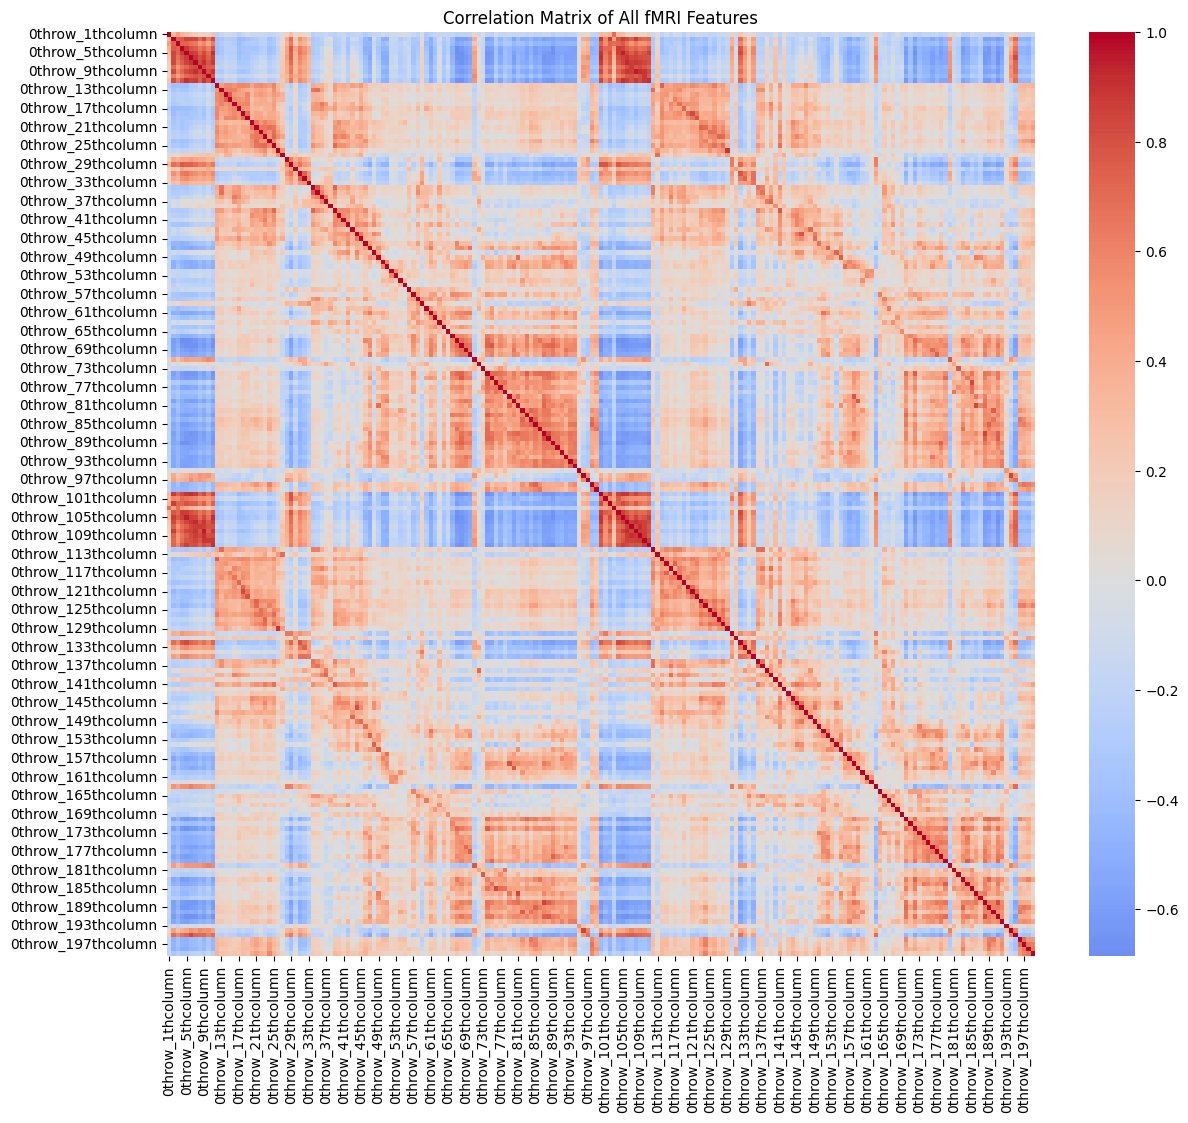

In [45]:
# Step 3: Visualize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of All fMRI Features")
plt.show()


In [28]:
# Step 4: Compute average absolute correlation
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
mean_corr = upper_triangle.abs().mean().mean()
print("Average absolute correlation between fMRI features:", round(mean_corr, 3))


Average absolute correlation between fMRI features: 0.266


### PCA on fMRI data to reduce dimensionality 

In [29]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=100, random_state=42)
fmri_pca = pca.fit_transform(fmri_df)

# Format PCA output
pca_fmri_df = pd.DataFrame(fmri_pca, columns=[f"pca_fmri_{i+1}" for i in range(100)])
pca_fmri_df['participant_id'] = pid
# Preview
print("PCA fMRI shape:", pca_fmri_df.shape)
pca_fmri_df.head()


PCA fMRI shape: (2426, 101)


,pca_fmri_1,pca_fmri_2,pca_fmri_3,pca_fmri_4,pca_fmri_5,pca_fmri_6,pca_fmri_7,pca_fmri_8,pca_fmri_9,pca_fmri_10,...,pca_fmri_92,pca_fmri_93,pca_fmri_94,pca_fmri_95,pca_fmri_96,pca_fmri_97,pca_fmri_98,pca_fmri_99,pca_fmri_100,participant_id
0,-1.213211,-0.001252,-0.069096,0.008331,0.000268,-0.091882,-0.015094,-0.033159,-0.047857,-0.084829,...,-0.037421,-0.002427,0.082624,0.016588,-0.016808,0.048428,-0.075093,0.041899,-0.000023,UmrK0vMLopoR_old
1,-1.271390,0.001125,-0.107699,0.012784,-0.059090,0.002214,-0.023076,-0.014382,0.057658,0.003775,...,0.032833,0.023760,0.027297,0.044483,0.040161,0.024550,-0.006210,-0.025468,-0.038466,CPaeQkhcjg7d_old
2,-1.239644,-0.024521,-0.018325,-0.036408,-0.071303,0.002163,0.035827,0.010386,-0.025538,-0.017831,...,0.004530,0.095974,-0.003687,-0.002120,0.075134,0.099934,-0.028088,0.004031,0.044763,Nb4EetVPm3gs_old
3,-1.220301,0.024931,-0.031220,-0.030301,0.000198,-0.055490,-0.015833,-0.048911,-0.030035,-0.039460,...,-0.086967,0.032714,-0.024952,0.066601,0.012579,-0.006923,-0.018919,0.020026,-0.095568,p4vPhVu91o4b_old
4,-1.203690,-0.035068,-0.082903,-0.000437,0.033897,-0.032312,-0.053628,-0.026157,-0.007054,0.019982,...,-0.003193,0.070587,-0.015911,-0.038229,0.011529,-0.022351,-0.015988,-0.015098,-0.031222,M09PXs7arQ5E_old


In [30]:
# # Step 1: Clean up participant_id to match formats
# pca_fmri_df["participant_id"] = pca_fmri_df["participant_id"].astype(str)
# train_final["participant_id"] = train_final["participant_id"].astype(str)
# train_final["participant_id"] = train_final["participant_id"].str.replace(r'_old.*|_new.*', '', regex=True)
# pca_fmri_df["participant_id"] = pca_fmri_df["participant_id"].str.replace(r'_old.*|_new.*', '', regex=True)

# Step 2: Drop original fMRI columns
fmri_cols = [col for col in train_final.columns if col.startswith("0throw_")]
train_final_dropped = train_final.drop(columns=fmri_cols)

# Step 3: Merge PCA fMRI back into train_final
train_final_pca = train_final_dropped.merge(pca_fmri_df, on="participant_id", how="inner")

# Step 4: Confirm shape
print("✅ Final dataset shape with PCA fMRI:", train_final_pca.shape)
train_final_pca.head()


✅ Final dataset shape with PCA fMRI: (2426, 19831)


,participant_id,ADHD_Outcome,Sex_F,1throw_2thcolumn,1throw_3thcolumn,1throw_4thcolumn,1throw_5thcolumn,1throw_6thcolumn,1throw_7thcolumn,1throw_8thcolumn,...,pca_fmri_91,pca_fmri_92,pca_fmri_93,pca_fmri_94,pca_fmri_95,pca_fmri_96,pca_fmri_97,pca_fmri_98,pca_fmri_99,pca_fmri_100
0,UmrK0vMLopoR_old,1,1,-0.148457,-0.925217,-0.745803,0.003700,-0.176904,0.657304,1.006518,...,-0.030867,-0.037421,-0.002427,0.082624,0.016588,-0.016808,0.048428,-0.075093,0.041899,-0.000023
1,CPaeQkhcjg7d_old,1,0,-0.837117,-0.884489,-0.594981,-0.374554,0.101588,0.351419,0.174279,...,-0.022526,0.032833,0.023760,0.027297,0.044483,0.040161,0.024550,-0.006210,-0.025468,-0.038466
2,Nb4EetVPm3gs_old,1,0,-0.214289,-0.924299,-0.325629,-0.535349,0.468459,0.339125,-0.069196,...,-0.038283,0.004530,0.095974,-0.003687,-0.002120,0.075134,0.099934,-0.028088,0.004031,0.044763
3,p4vPhVu91o4b_old,1,1,-0.061436,-1.079269,-0.430928,-0.873776,0.348316,0.275260,0.422016,...,-0.017282,-0.086967,0.032714,-0.024952,0.066601,0.012579,-0.006923,-0.018919,0.020026,-0.095568
4,M09PXs7arQ5E_old,1,1,0.387556,-0.826697,-0.449800,0.040412,0.205947,-0.004690,0.261534,...,0.081365,-0.003193,0.070587,-0.015911,-0.038229,0.011529,-0.022351,-0.015988,-0.015098,-0.031222


In [31]:
# Define feature matrix and targets
X = train_final_pca.drop(columns=["participant_id", "ADHD_Outcome", "Sex_F"])
y = train_final_pca[["ADHD_Outcome", "Sex_F"]]

print("✅ X shape:", X.shape)
print("✅ y shape:", y.shape)


✅ X shape: (2426, 19828)
✅ y shape: (2426, 2)


# Regression model fitting/testing (cross validation, avoiding over/underfitting, stratification of data during training)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

# Define a pipeline with scaling and Logistic Regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Set up the parameter grid (C is the inverse of regularization strength)
param_grid = {
    'lr__C': [0.01, 0.1, 1, 10, 100]
}

# Use StratifiedKFold to preserve class balance in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Tune for ADHD_Outcome
grid_adhd = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1)
grid_adhd.fit(X, y['ADHD_Outcome'])

print("Best parameters for ADHD_Outcome:", grid_adhd.best_params_)
print("Best cross-validated F1 score for ADHD_Outcome:", grid_adhd.best_score_)

# Tune for Sex_F
grid_sex = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1)
grid_sex.fit(X, y['Sex_F'])

print("Best parameters for Sex_F:", grid_sex.best_params_)
print("Best cross-validated F1 score for Sex_F:", grid_sex.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for ADHD_Outcome: {'lr__C': 10}
Best cross-validated F1 score for ADHD_Outcome: 0.9014963700221401
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Sex_F: {'lr__C': 0.1}
Best cross-validated F1 score for Sex_F: 0.7561418738722274


# Explaining factors that drive the performance of the model

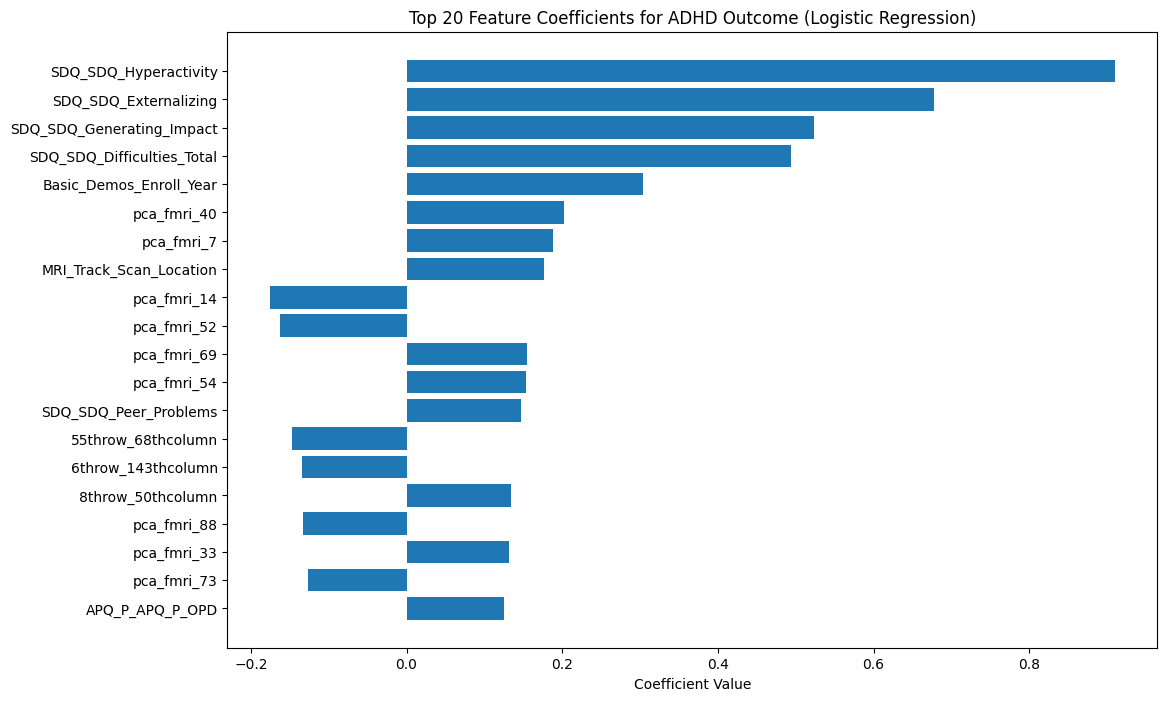

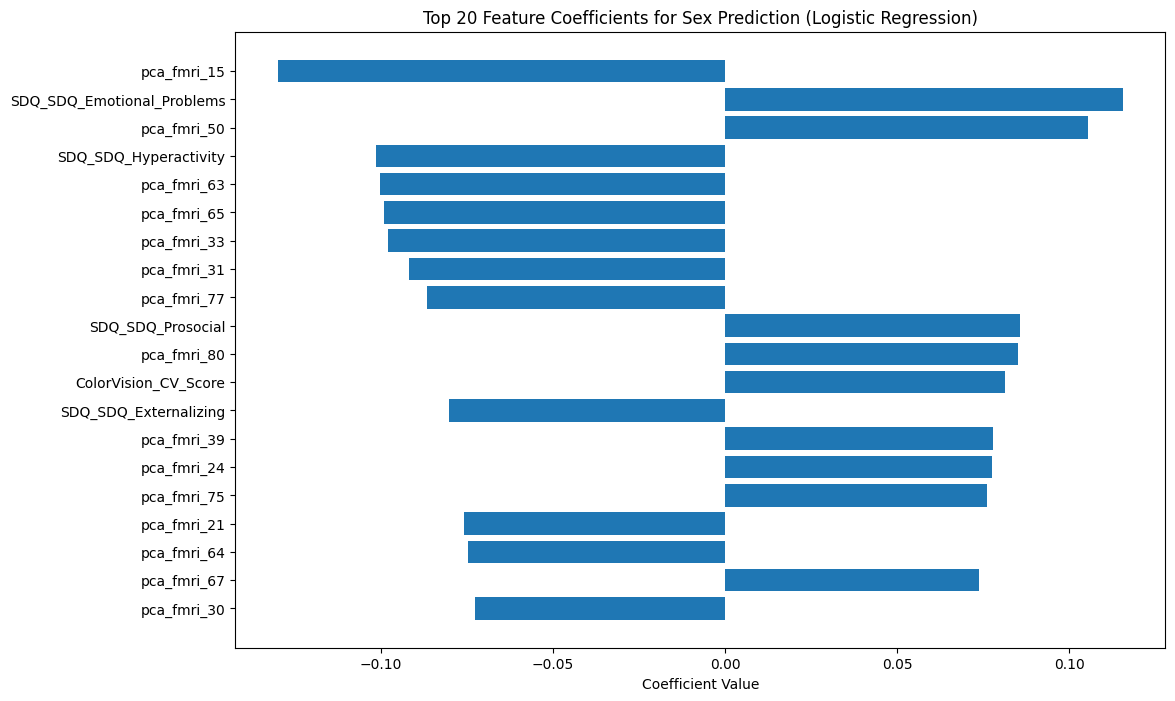

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume X is your final feature matrix (all features used by the model) and 
# grid_adhd and grid_sex are the GridSearchCV objects for ADHD and Sex respectively.

# Get feature names from X
feature_names = X.columns

# --- For ADHD_Outcome ---
# Retrieve the best Logistic Regression model for ADHD
lr_model_adhd = grid_adhd.best_estimator_.named_steps['lr']

# Get coefficients (note: if you used StandardScaler in the pipeline, coefficients are comparable)
coef_adhd = lr_model_adhd.coef_[0]
coef_df_adhd = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef_adhd
})
coef_df_adhd['abs_coef'] = coef_df_adhd['coefficient'].abs()
coef_df_adhd = coef_df_adhd.sort_values(by='abs_coef', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(coef_df_adhd['feature'].head(20), coef_df_adhd['coefficient'].head(20))
plt.xlabel("Coefficient Value")
plt.title("Top 20 Feature Coefficients for ADHD Outcome (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()


# --- For Sex_F ---
# Retrieve the best Logistic Regression model for Sex
lr_model_sex = grid_sex.best_estimator_.named_steps['lr']

coef_sex = lr_model_sex.coef_[0]
coef_df_sex = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coef_sex
})
coef_df_sex['abs_coef'] = coef_df_sex['coefficient'].abs()
coef_df_sex = coef_df_sex.sort_values(by='abs_coef', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(coef_df_sex['feature'].head(20), coef_df_sex['coefficient'].head(20))
plt.xlabel("Coefficient Value")
plt.title("Top 20 Feature Coefficients for Sex Prediction (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


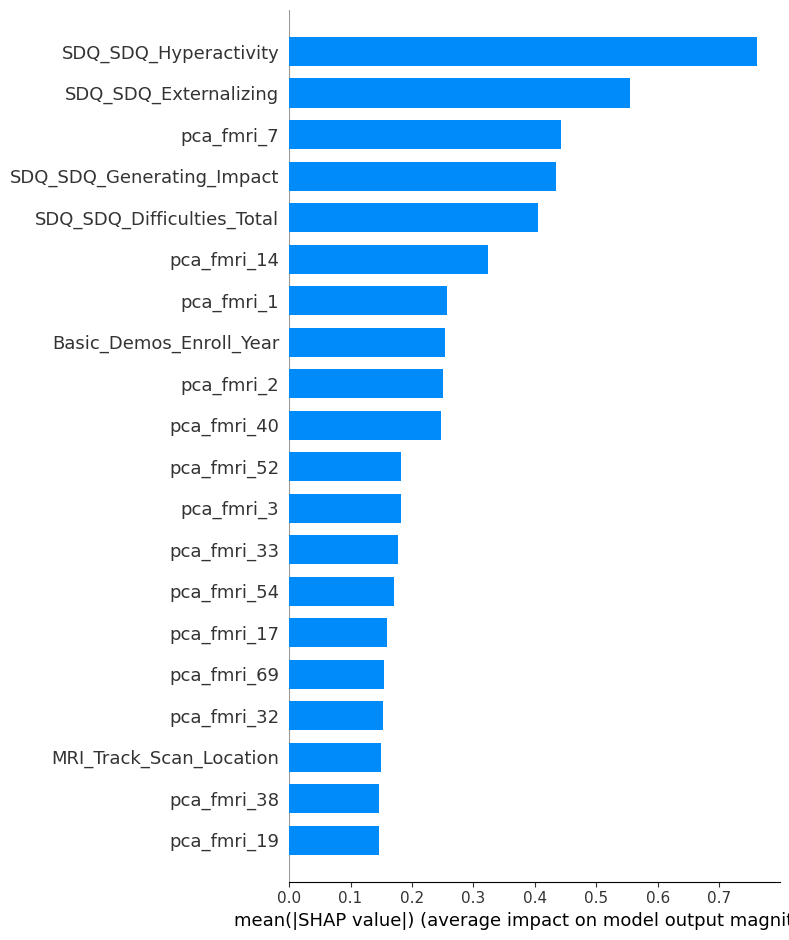

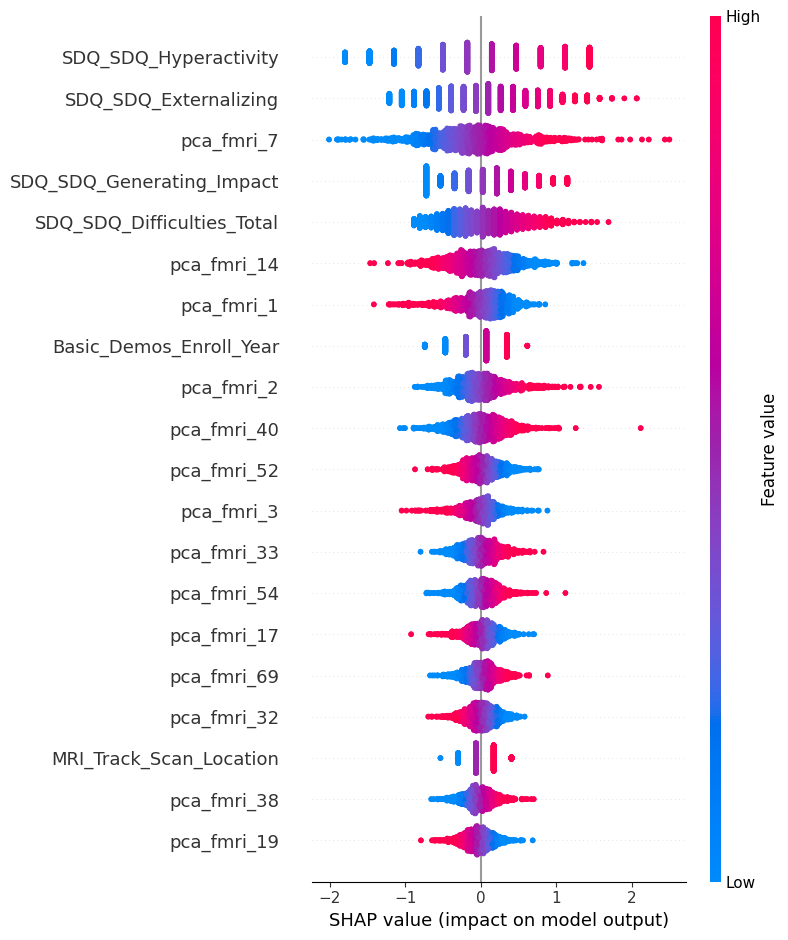

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


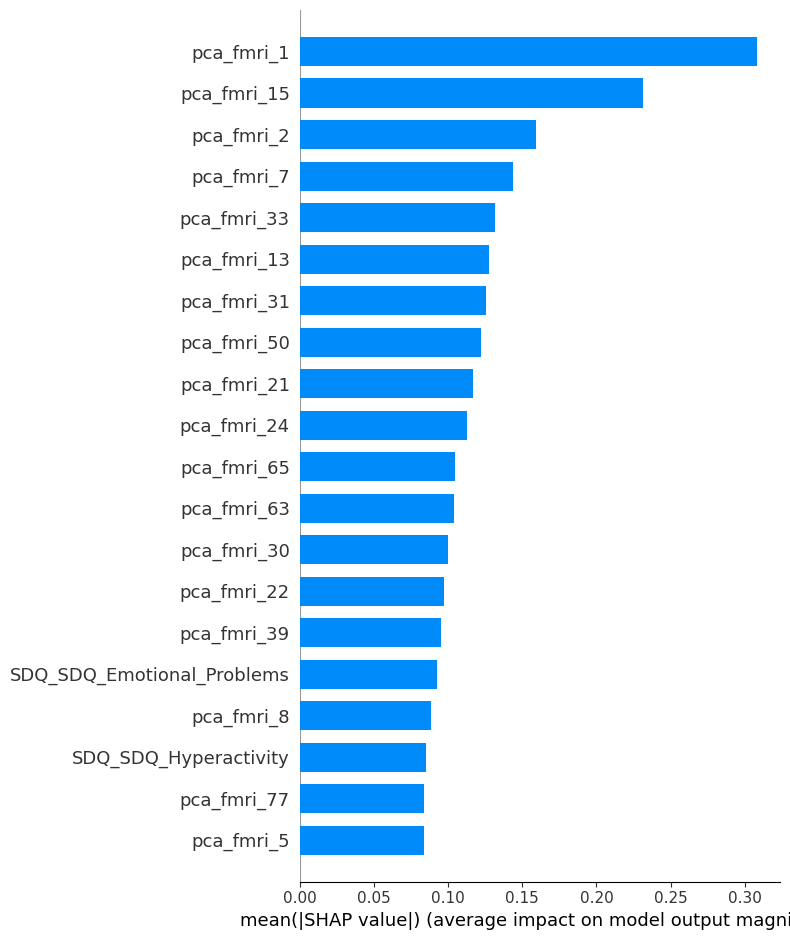

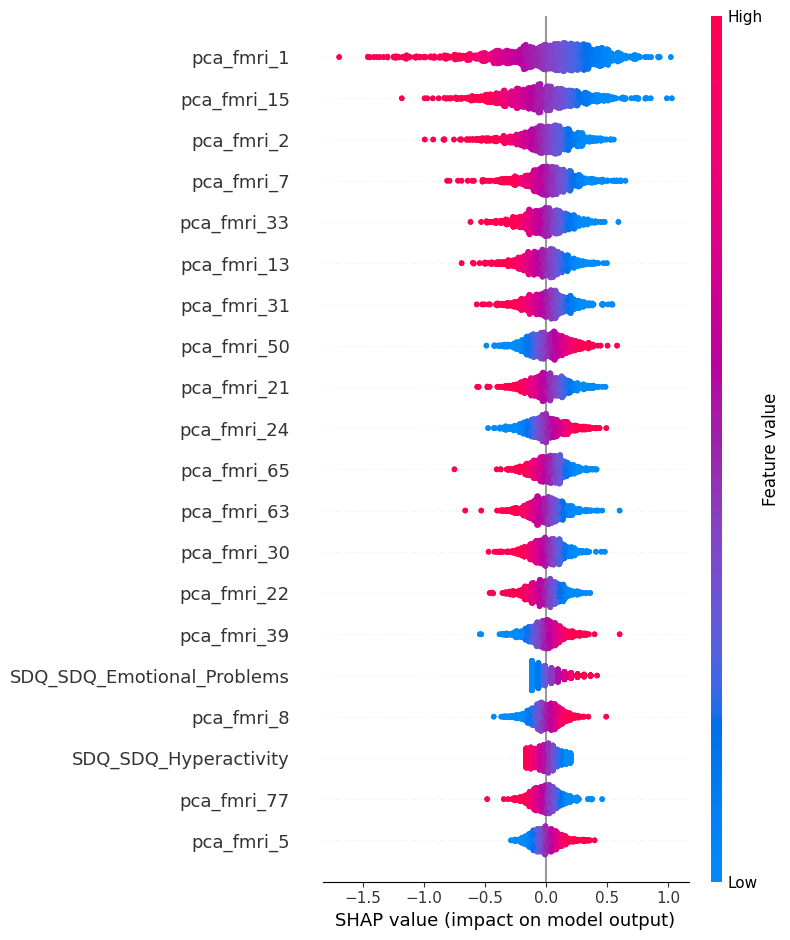

In [31]:
import shap

# For ADHD_Outcome: create a SHAP explainer for the best ADHD model
explainer_adhd = shap.LinearExplainer(lr_model_adhd, X, feature_perturbation="interventional")
shap_values_adhd = explainer_adhd.shap_values(X)

# Global summary plot (bar plot)
shap.summary_plot(shap_values_adhd, X, plot_type="bar", feature_names=feature_names)

# Detailed summary plot (beeswarm)
shap.summary_plot(shap_values_adhd, X, feature_names=feature_names)


# For Sex_F: create a SHAP explainer for the best Sex model
explainer_sex = shap.LinearExplainer(lr_model_sex, X, feature_perturbation="interventional")
shap_values_sex = explainer_sex.shap_values(X)

# Global summary plot (bar plot)
shap.summary_plot(shap_values_sex, X, plot_type="bar", feature_names=feature_names)

# Detailed summary plot (beeswarm)
shap.summary_plot(shap_values_sex, X, feature_names=feature_names)


### Coefficient Analysis:

The code retrieves the coefficients from our best logistic regression models (one for ADHD_Outcome and one for Sex_F).

It then sorts features by the absolute value of their coefficient.

A horizontal bar plot shows the top 20 features. Positive coefficients indicate that an increase in the feature increases the probability of the positive class (e.g., ADHD = 1), while negative coefficients do the opposite.

### SHAP Explanation:

A LinearExplainer is used because our model is linear. The explainer calculates the contribution (SHAP value) of each feature to the prediction.

# Multi-outcome prediction

### Loading and Preprocessing

In [33]:
import pandas as pd

# Set the test path
TEST_PATH = "/kaggle/input/widsdatathon2025/TEST"

# Load Test Categorical Metadata
test_cat = pd.read_excel(f"{TEST_PATH}/TEST_CATEGORICAL.xlsx")
print("Test Categorical Metadata Shape:", test_cat.shape)
print(test_cat.head())

# Load Test Quantitative Metadata
test_quant = pd.read_excel(f"{TEST_PATH}/TEST_QUANTITATIVE_METADATA.xlsx")
print("Test Quantitative Metadata Shape:", test_quant.shape)
print(test_quant.head())

# Load Test fMRI Data
test_fmri = pd.read_csv(f"{TEST_PATH}/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
print("Test fMRI Data Shape:", test_fmri.shape)
print(test_fmri.head())


Test Categorical Metadata Shape: (304, 10)
  participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   Cfwaf5FX7jWK                     2022                       4   
1   vhGrzmvA3Hjq                     2023                       4   
2   ULliyEXjy4OV                     2022                       4   
3   LZfeAb1xMtql                     2022                       4   
4   EnFOUv0YK1RG                     2022                       4   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               2.0                          0.0   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        4                    21.0     

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Test fMRI Data Shape: (304, 19901)
  participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   Cfwaf5FX7jWK          0.548480          0.713607          0.557319   
1   vhGrzmvA3Hjq          0.427740          0.363022          0.402862   
2   ULliyEXjy4OV          0.139572          0.390106         -0.087041   
3   LZfeAb1xMtql          0.133561          0.778326          0.416355   
4   EnFOUv0YK1RG          0.126699          0.575446          0.509422   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.524369          0.693364          0.770032          0.724406   
1          0.363003          0.534558          0.345347          0.409471   
2          0.196852          0.088148          0.023843          0.381782   
3          0.471840          0.568460          0.633660          0.501113   
4          0.363193          0.427544          0.449924          0.451796   

   0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196t

In [34]:
# Merge the test categorical and quantitative metadata on participant_id
test_merged = test_cat.merge(test_quant, on="participant_id")

# Merge the resulting DataFrame with the test fMRI data on participant_id
test_combined = test_merged.merge(test_fmri, on="participant_id")

# Check the shape and preview the merged test data
print("Combined Test Data Shape:", test_combined.shape)
test_combined.head()


Combined Test Data Shape: (304, 19928)


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [35]:
# Check for missing values in the combined test dataset
missing_test = test_combined.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)

if missing_test.empty:
    print("No missing values in the test dataset.")
else:
    print("Missing values in the test dataset:")
    print(missing_test)


Missing values in the test dataset:
Barratt_Barratt_P2_Occ              42
Barratt_Barratt_P2_Edu              36
SDQ_SDQ_Generating_Impact           30
SDQ_SDQ_Hyperactivity               30
SDQ_SDQ_Internalizing               30
SDQ_SDQ_Peer_Problems               30
SDQ_SDQ_Conduct_Problems            30
SDQ_SDQ_Prosocial                   30
SDQ_SDQ_Externalizing               30
SDQ_SDQ_Emotional_Problems          30
SDQ_SDQ_Difficulties_Total          30
APQ_P_APQ_P_CP                      15
APQ_P_APQ_P_ID                      15
APQ_P_APQ_P_OPD                     15
APQ_P_APQ_P_PP                      15
APQ_P_APQ_P_PM                      15
APQ_P_APQ_P_INV                     15
ColorVision_CV_Score                 9
PreInt_Demos_Fam_Child_Race          6
PreInt_Demos_Fam_Child_Ethnicity     3
EHQ_EHQ_Total                        1
Barratt_Barratt_P1_Edu               1
Barratt_Barratt_P1_Occ               1
dtype: int64


In [36]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assume test_combined is your merged test dataset (after merging TEST_CATEGORICAL.xlsx, 
# TEST_QUANTITATIVE_METADATA.xlsx, and TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv)

# Define feature columns: remove participant_id and any target columns (if present)
# If your test set doesn't include targets, just remove participant_id.
feature_cols = [col for col in test_combined.columns if col not in ["participant_id", "ADHD_Outcome", "Sex_F"]]

# fMRI features start with "0throw_"
fmri_cols = [col for col in feature_cols if col.startswith("0throw_")]

# Metadata columns are those that are not fMRI features
meta_cols = [col for col in feature_cols if col not in fmri_cols]

# Quantitative metadata = numerical columns in meta
quantitative_cols = test_combined[meta_cols].select_dtypes(include='number').columns.tolist()

# Categorical metadata = object or category columns in meta
categorical_cols = test_combined[meta_cols].select_dtypes(include=['object', 'category']).columns.tolist()

# Now, apply median imputation to the quantitative metadata columns (just like in training)
quant_imputer = SimpleImputer(strategy='median')
test_combined[quantitative_cols] = quant_imputer.fit_transform(test_combined[quantitative_cols])

print("Imputation complete for all metadata columns (numeric only) in the test dataset.")


Imputation complete for all metadata columns (numeric only) in the test dataset.


In [37]:
# -------------------------------
# 5. Process fMRI Data with PCA
# -------------------------------
# Extract fMRI features from test_combined
test_fmri_df = test_combined[fmri_cols]

# Apply PCA with 100 components (use the same n_components as in training)
pca = PCA(n_components=100, random_state=42)
test_fmri_pca = pca.fit_transform(test_fmri_df)

# Create a DataFrame for the PCA output and reattach participant_id
pca_fmri_df = pd.DataFrame(test_fmri_pca, 
                           columns=[f"pca_fmri_{i+1}" for i in range(100)],
                           index=test_fmri_df.index)
pca_fmri_df["participant_id"] = test_combined["participant_id"].astype(str)
print("Test fMRI PCA shape:", pca_fmri_df.shape)

Test fMRI PCA shape: (304, 101)


In [38]:
# -------------------------------
# 6. Process Metadata: Standardize
# -------------------------------
# For consistency, standardize the quantitative metadata using StandardScaler.
scaler = StandardScaler()
test_quant_scaled = pd.DataFrame(
    scaler.fit_transform(test_combined[quantitative_cols]),
    columns=quantitative_cols,
    index=test_combined.index
)

# Extract the metadata part and add participant_id back
test_meta = test_combined[meta_cols].copy()
test_meta[quantitative_cols] = test_quant_scaled
test_meta["participant_id"] = test_combined["participant_id"].astype(str)

<ipython-input-38-819489ae8815>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_meta["participant_id"] = test_combined["participant_id"].astype(str)


In [39]:
# -------------------------------
# 7. Combine Processed Metadata and fMRI PCA Features
# -------------------------------
test_features = test_meta.merge(pca_fmri_df, on="participant_id")
print("Final test feature matrix shape (with participant_id):", test_features.shape)

# Drop participant_id for predictions
X_test_final = test_features.drop(columns=["participant_id"])
print("Final X_test shape:", X_test_final.shape)

Final test feature matrix shape (with participant_id): (304, 19829)
Final X_test shape: (304, 19828)


In [40]:
# Reorder X_test_final to match the feature names used during training
# Using the StandardScaler step of your best estimator from grid_adhd
# Ensure order but avoid missing columns
feature_names = grid_adhd.best_estimator_.named_steps["scaler"].feature_names_in_
common_features = [col for col in feature_names if col in X_test_final.columns]

X_test_final_ordered = X_test_final[common_features]

In [42]:
try:
    # Predict using final ordered test features
    adhd_preds = grid_adhd.best_estimator_.predict(X_test_final_ordered)
    sex_preds  = grid_sex.best_estimator_.predict(X_test_final_ordered)

    # Create submission DataFrame with correct IDs
    submission = pd.DataFrame({
        "participant_id": test_features["participant_id"],
        "ADHD_Outcome": adhd_preds,
        "Sex_F": sex_preds
    })

    # Save submission
    submission.to_csv("/kaggle/working/submission.csv", index=False)
    print("✅ submission.csv created successfully:", submission.shape)

except Exception as e:
    print("❌ Error during submission creation:", e)

    # Fallback
    fallback = pd.read_excel("/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx")
    fallback.to_csv("/kaggle/working/submission.csv", index=False)
    print("⚠️ Fallback sample submission saved.")


✅ submission.csv created successfully: (304, 3)
